# Predicting diabetes status using NHANES

[DSLC stages]: Analysis



The following code sets up the libraries and creates cleaned and pre-processed training, validation and test data that we will use in this document.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

from functions.load_diabetes_data import load_diabetes_data
# load the diabetes data

train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('val_data.csv')
test_data = pd.read_csv('test_data.csv')
imputed_2017 = pd.read_csv('imputed_2017.csv')

train_data_noSMOTE = pd.read_csv('train_data_noSMOTE.csv')
val_data_noSMOTE = pd.read_csv('val_data_noSMOTE.csv')
test_data_noSMOTE = pd.read_csv('test_data_noSMOTE.csv')

pd.set_option('display.max_columns', None)

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)
print(imputed_2017.shape)

In [ ]:
X_test_2017 = imputed_2017.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_test_2017 = imputed_2017['diabetes']
X_test_2017 = X_test_2017.drop(columns=columns_to_drop.values[1:])

# To predict on the test data
X_test = test_data.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_test = test_data['diabetes']
X_test = X_test.drop(columns=columns_to_drop.values[1:])

In [35]:
X_train_noSMOTE = train_data_noSMOTE.drop(['diabetes', 'house_family_person_id'], axis=1)
y_train_noSMOTE = train_data_noSMOTE['diabetes']

X_val_noSMOTE = val_data_noSMOTE.drop(['diabetes', 'house_family_person_id'], axis=1)
y_val_noSMOTE = val_data_noSMOTE['diabetes']

X_test_noSMOTE = test_data_noSMOTE.drop(['diabetes', 'house_family_person_id'], axis=1)
y_test_noSMOTE = test_data_noSMOTE['diabetes']

# Optional: Check for missing values
#print(X_train.isnull().sum())
#print(X_val.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_train_scaled_noSMOTE = scaler.fit_transform(X_train_noSMOTE)
X_val_scaled_noSMOTE = scaler.transform(X_val_noSMOTE)
X_test_scaled_noSMOTE = scaler.transform(X_test_noSMOTE)

In [18]:
train_data.head(10)

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,high_blood_pressure_prescription,medicated,prediabetes,insulin,region_Midwest,region_Northwest,region_South,marital_status_Divorced,marital_status_Living with partner,marital_status_Married,marital_status_Never_married,marital_status_Separated,marital_status_Widdowed
0,277060102.0,1.0,60.0,0.0,1.0,0.0,136.2,2307.4,66.0,1.0,0.0,0.0,1.0,1.0,5.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,389730101.0,1.0,48.0,1.0,0.0,0.0,188.0,2624.0,71.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,468630101.0,0.0,66.0,0.0,1.0,0.0,140.0,2261.0,66.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,256810101.0,0.0,48.0,1.0,1.0,0.0,165.0,2829.0,64.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,300550101.0,0.0,39.0,1.0,0.0,0.0,148.0,2316.0,67.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,652990101.0,0.0,61.0,1.0,0.0,0.0,195.0,3055.0,67.0,1.0,1.0,0.0,0.0,1.0,7.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,429240101.0,0.0,69.0,1.0,1.0,0.0,140.0,2330.0,65.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,628450101.0,1.0,80.0,0.0,0.0,1.0,212.0,2583.0,76.0,1.0,0.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,392830101.0,0.0,60.0,0.0,0.0,0.0,214.0,2903.0,72.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,139790101.0,0.0,30.0,0.0,0.0,0.0,242.0,3026.0,75.0,0.0,0.0,0.0,0.0,1.0,7.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Sample dataset
# df = pd.read_csv('your_data.csv')  # Load your dataset

# Prepare your features (X)
# Assuming 'diabetes' is your target variable and all other columns are features
X = train_data.drop(columns=['diabetes'])

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [sm.OLS(X[column], X.loc[:, X.columns != column]).fit().rsquared for column in X.columns]

# Calculate the VIF
vif_data['VIF'] = 1 / (1 - vif_data['VIF'])

# Display the VIF results
print(vif_data)


In [ ]:
# Identify columns with mean above the threshold
threshold = 10
columns_to_drop = vif_data[vif_data["VIF"] > threshold]
print(columns_to_drop)
#print(vif_data[vif_data["VIF"] > threshold])
columns_to_drop = columns_to_drop["Feature"]
print(columns_to_drop.values)

# Drop those columns
train_data = train_data.drop(columns=columns_to_drop.values[1:])

In [36]:
#!pip install xgboost
import xgboost as xgb
print(xgb.__version__)

2.1.1


In [126]:
print(X_train.shape)
print(X_val.shape)
print(X_test_2017.shape)

(26104, 24)
(8701, 24)
(26311, 24)


In [127]:
X_test_2017.head()

,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,high_blood_pressure_prescription,medicated,prediabetes,insulin,stroke,cholesterol,region_Midwest,region_Northwest,region_South
0,65.0,1.0,1.0,0.0,155.0,2930.0,61.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,19.0,0.0,0.0,0.0,180.0,2309.0,74.0,0.0,0.0,0.0,0.0,1.0,3.8,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,45.0,1.0,0.0,0.0,240.0,3544.0,69.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,67.0,1.0,1.0,0.0,236.0,4313.0,62.0,0.0,0.0,0.0,0.0,1.0,7.0,3.0,12.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,40.0,1.0,0.0,0.0,182.0,3227.0,63.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming the target variable is named 'diabetes' and is binary (0 or 1)
X_train = train_data.drop(['diabetes', 'house_family_person_id'], axis=1)
y_train = train_data['diabetes']

X_val = val_data.drop(['diabetes', 'house_family_person_id'], axis=1)
y_val = val_data['diabetes']
# Drop those columns
X_val = X_val.drop(columns=columns_to_drop.values[1:])

# Optional: Check for missing values
#print(X_train.isnull().sum())
#print(X_val.isnull().sum())

# Scale the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)

# Calculate the number of samples in each class
count_0 = sum(y_train == 0)
count_1 = sum(y_train == 1)

# Calculate the ratio
ratio_of_majority_to_minority = count_0 / count_1


xgb_clf = XGBClassifier(
    n_estimators=2000, 
    learning_rate=0.005, 
    eval_metric='aucpr', 
    max_depth=5,
    reg_alpha=5,  # Increased L1 regularization
    reg_lambda=15,  # Increased L2 regularization
    #scale_pos_weight=ratio_of_majority_to_minority
)
#xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.01, eval_metric='aucpr', max_depth=3)
xgb_clf.fit(X_train, y_train, eval_set=[(X_test_2017, y_test_2017)], verbose=False)

y_train_pred = xgb_clf.predict(X_train)

# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred = xgb_clf.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = xgb_clf.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

#X_test_2017 = X_test_2017.drop(columns=columns_to_drop.values[1:])
y_pred_2017 = xgb_clf.predict(X_test_2017)
y_pred_probs = xgb_clf.predict_proba(X_test_2017)[:, 1]
threshold = 0.2632804811000824
y_pred_custom = (y_pred_probs >= threshold).astype(int)  # Apply custom threshold
print()
print(confusion_matrix(y_test_2017, y_pred_custom))
print(classification_report(y_test_2017, y_pred_custom))

print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))

Train
Accuracy: 0.9397410358565738
Confusion Matrix:
 [[16922   463]
 [ 1110  7609]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.96     17385
         1.0       0.94      0.87      0.91      8719

    accuracy                           0.94     26104
   macro avg       0.94      0.92      0.93     26104
weighted avg       0.94      0.94      0.94     26104

VAL
Accuracy: 0.9339156418802437
Confusion Matrix:
 [[5592  173]
 [ 402 2534]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      5765
         1.0       0.94      0.86      0.90      2936

    accuracy                           0.93      8701
   macro avg       0.93      0.92      0.92      8701
weighted avg       0.93      0.93      0.93      8701

TEST
Accuracy: 0.936451390484946
Confusion Matrix:
 [[5684  171]
 [ 382 2465]]
Classification Report:
               precision    reca

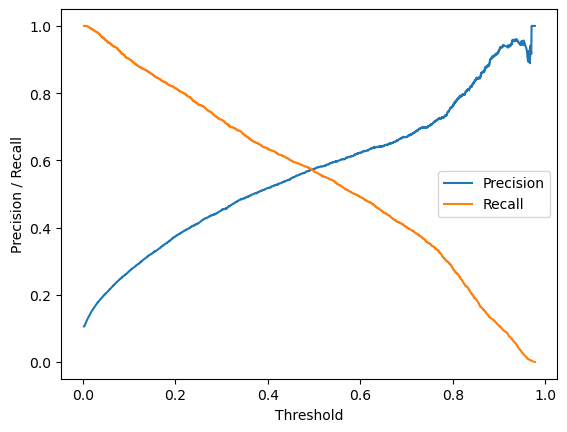

In [37]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test_2017, y_pred_probs)

# Plot the Precision-Recall curve
import matplotlib.pyplot as plt

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall")
plt.legend(loc="best")
plt.show()


In [34]:
from sklearn.metrics import f1_score

# Initialize best score
best_threshold = 0.5
best_f1 = 0

# Test different thresholds
for thresh in thresholds:
    y_pred_thresh = (y_pred_probs >= thresh).astype(int)
    f1 = f1_score(y_test_2017, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

print(f"Best F1-Score: {best_f1} at Threshold: {best_threshold}")


Best F1-Score: 0.5760209939314417 at Threshold: 0.2632804811000824


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'scale_pos_weight': [1, 10, 20]  # Adjust this based on the imbalance
}

model = XGBClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='precision', cv=3)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)

# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred = best_model.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = best_model.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

y_pred_2017 = best_model.predict(X_test_2017)
print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))

Train
Accuracy: 0.9477474716518541
Confusion Matrix:
 [[17044   341]
 [ 1023  7696]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     17385
         1.0       0.96      0.88      0.92      8719

    accuracy                           0.95     26104
   macro avg       0.95      0.93      0.94     26104
weighted avg       0.95      0.95      0.95     26104

VAL
Accuracy: 0.9352947937018733
Confusion Matrix:
 [[5611  154]
 [ 409 2527]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      5765
         1.0       0.94      0.86      0.90      2936

    accuracy                           0.94      8701
   macro avg       0.94      0.92      0.93      8701
weighted avg       0.94      0.94      0.93      8701

TEST
Accuracy: 0.9342679843714089
Confusion Matrix:
 [[5680  175]
 [ 397 2450]]
Classification Report:
               precision    rec

In [39]:
from imblearn.ensemble import BalancedRandomForestClassifier
clf = BalancedRandomForestClassifier()
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)

# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred = clf.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = clf.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

y_pred_2017 = clf.predict(X_test_2017)
print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))


C:\Users\15184\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\15184\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\15184\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Train
Accuracy: 0.9911124731841864
Confusion Matrix:
 [[17153   232]
 [    0  8719]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     17385
         1.0       0.97      1.00      0.99      8719

    accuracy                           0.99     26104
   macro avg       0.99      0.99      0.99     26104
weighted avg       0.99      0.99      0.99     26104

VAL
Accuracy: 0.9304677623261695
Confusion Matrix:
 [[5468  297]
 [ 308 2628]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      5765
         1.0       0.90      0.90      0.90      2936

    accuracy                           0.93      8701
   macro avg       0.92      0.92      0.92      8701
weighted avg       0.93      0.93      0.93      8701

TEST
Accuracy: 0.9343829004826477
Confusion Matrix:
 [[5573  282]
 [ 289 2558]]
Classification Report:
               precision    rec

In [54]:
#!pip install lightgbm
!pip install catboost

In [53]:
!pip install lightgbm


In [ ]:
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.01, is_unbalance=True)
lgb_clf.fit(X_train, y_train)


y_train_pred = lgb_clf.predict(X_train)

# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred = lgb_clf.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = lgb_clf.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

y_pred_2017 = lgb_clf.predict(X_test_2017)
print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))

In [57]:
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(n_estimators=1000, learning_rate=0.01, auto_class_weights='Balanced', verbose=False)
cat_clf.fit(X_train, y_train)

y_train_pred = cat_clf.predict(X_train)

# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred = cat_clf.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = cat_clf.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

y_pred_2017 = cat_clf.predict(X_test_2017)
print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))


ModuleNotFoundError: No module named 'catboost'

In [58]:
pip show lightgbm


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', XGBClassifier(n_estimators=1000, learning_rate=0.01)),
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)

y_train_pred = stacking_clf.predict(X_train)

# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred = stacking_clf.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = stacking_clf.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

y_pred_2017 = stacking_clf.predict(X_test_2017)
print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))

In [2]:
m = 26311
p0 = 0.94
p1 = 0.66
p_ = p1+ 1.95*((p1*(1-p1)/m)**0.5)
p__ = p1-1.95*((p1*(1-p1)/m)**0.5)

print(p_,p__)

0.665694785366072 0.6543052146339281


In [98]:
y_val_pred = xgb_clf.predict(X_val)


# Assuming y_true and y_pred are your true and predicted labels
report = classification_report((y_val, y_val_pred, output_dict=True)
precision_0 = report['0.0']['precision']
recall_0 = report['0.0']['recall']
precision_1 = report['1.0']['precision']
recall_1 = report['1.0']['recall']

y_pred_2017 = xgb_clf.predict(X_test_2017)

report_2017 = classification_report(y_test_2017, y_pred_2017, output_dict=True)
precision_0_2017 = report_2017['0.0']['precision']
recall_0_2017 = report_2017['0.0']['recall']
precision_1_2017 = report_2017['1.0']['precision']
recall_1_2017 = report_2017['1.0']['recall']


In [101]:
import numpy as np
from scipy import stats

# Set the significance level
alpha = 0.05

# Define null hypothesis values (expected precision under H0)
p0_0 = precision_0  # Expected precision for class 0.0 (you can adjust this)
p0_1 = precision_1  # Expected precision for class 1.0 (you can adjust this)

# Get the number of samples for the precision calculations
n = len(y_pred_2017)  # Total number of samples

# 1. Evaluate the performance for class 0.0
observed_precision_0 = precision_0_2017

# Calculate Z-test statistic for class 0.0
Z_0 = (observed_precision_0 - p0_0) / np.sqrt((p0_0 * (1 - p0_0)) / n)

# Calculate p-value for class 0.0
p_value_0 = 2 * (1 - stats.norm.cdf(np.abs(Z_0)))

# Evaluate the hypothesis for class 0.0
print(f"Class 0.0 Performance Evaluation:")
print(f"Observed Precision: {observed_precision_0:.4f}")
print(f"Null Hypothesis Precision (p0): {p0_0:.4f}")
print(f"Z-Statistic: {Z_0:.4f}")
print(f"P-Value: {p_value_0:.4f}")

if p_value_0 < alpha:
    print("Reject the null hypothesis: The model's precision for class 0.0 is significantly different from the expected value.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the model's precision for class 0.0.")

print("\n" + "-"*50 + "\n")  # Separator for clarity

# 2. Evaluate the performance for class 1.0
observed_precision_1 = precision_1_2017

# Calculate Z-test statistic for class 1.0
Z_1 = (observed_precision_1 - p0_1) / np.sqrt((p0_1 * (1 - p0_1)) / n)

# Calculate p-value for class 1.0
p_value_1 = 2 * (1 - stats.norm.cdf(np.abs(Z_1)))

# Evaluate the hypothesis for class 1.0
print(f"Class 1.0 Performance Evaluation:")
print(f"Observed Precision: {observed_precision_1:.4f}")
print(f"Null Hypothesis Precision (p0): {p0_1:.4f}")
print(f"Z-Statistic: {Z_1:.4f}")
print(f"P-Value: {p_value_1:.4f}")

if p_value_1 < alpha:
    print("Reject the null hypothesis: The model's precision for class 1.0 is significantly different from the expected value.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the model's precision for class 1.0.")



Class 0.0 Performance Evaluation:
Observed Precision: 0.9354
Null Hypothesis Precision (p0): 0.9451
Z-Statistic: -6.9477
P-Value: 0.0000
Reject the null hypothesis: The model's precision for class 0.0 is significantly different from the expected value.

--------------------------------------------------

Class 1.0 Performance Evaluation:
Observed Precision: 0.6569
Null Hypothesis Precision (p0): 0.9560
Z-Statistic: -236.4810
P-Value: 0.0000
Reject the null hypothesis: The model's precision for class 1.0 is significantly different from the expected value.


In [39]:
xgb_clf_noSMOTE = XGBClassifier(
    reg_alpha=0.1,  # L1 regularization term (alpha)
    reg_lambda=1    # L2 regularization term (lambda)
)
xgb_clf_noSMOTE = XGBClassifier(n_estimators=1000, learning_rate=0.01)
xgb_clf_noSMOTE.fit(X_train_scaled_noSMOTE, y_train_noSMOTE, eval_set=[(X_val_scaled_noSMOTE, y_val_noSMOTE)])

y_train_pred_noSMOTE = xgb_clf.predict(X_train_noSMOTE)

# Evaluate the model
print("Train_noSMOTE")
print("Accuracy:", accuracy_score(y_train_noSMOTE, y_train_pred_noSMOTE))
print("Confusion Matrix:\n", confusion_matrix(y_train_noSMOTE, y_train_pred_noSMOTE))
print("Classification Report:\n", classification_report(y_train_noSMOTE, y_train_pred_noSMOTE))

y_val_pred_noSMOTE = xgb_clf.predict(X_val_noSMOTE)

# Evaluate the model
print("VAL_noSMOTE")
print("Accuracy:", accuracy_score(y_val_noSMOTE, y_val_pred_noSMOTE))
print("Confusion Matrix:\n", confusion_matrix(y_val_noSMOTE, y_val_pred_noSMOTE))
print("Classification Report:\n", classification_report(y_val_noSMOTE, y_val_pred_noSMOTE))

[0]	validation_0-logloss:0.36085
[1]	validation_0-logloss:0.35843
[2]	validation_0-logloss:0.35608
[3]	validation_0-logloss:0.35378
[4]	validation_0-logloss:0.35157
[5]	validation_0-logloss:0.34943
[6]	validation_0-logloss:0.34730
[7]	validation_0-logloss:0.34523
[8]	validation_0-logloss:0.34323
[9]	validation_0-logloss:0.34126
[10]	validation_0-logloss:0.33935
[11]	validation_0-logloss:0.33744
[12]	validation_0-logloss:0.33564
[13]	validation_0-logloss:0.33382
[14]	validation_0-logloss:0.33207
[15]	validation_0-logloss:0.33033
[16]	validation_0-logloss:0.32865
[17]	validation_0-logloss:0.32697
[18]	validation_0-logloss:0.32536
[19]	validation_0-logloss:0.32378
[20]	validation_0-logloss:0.32221
[21]	validation_0-logloss:0.32067
[22]	validation_0-logloss:0.31912
[23]	validation_0-logloss:0.31766
[24]	validation_0-logloss:0.31620
[25]	validation_0-logloss:0.31479
[26]	validation_0-logloss:0.31338
[27]	validation_0-logloss:0.31200
[28]	validation_0-logloss:0.31066
[29]	validation_0-loglos

[238]	validation_0-logloss:0.21997
[239]	validation_0-logloss:0.21987
[240]	validation_0-logloss:0.21976
[241]	validation_0-logloss:0.21964
[242]	validation_0-logloss:0.21953
[243]	validation_0-logloss:0.21944
[244]	validation_0-logloss:0.21936
[245]	validation_0-logloss:0.21927
[246]	validation_0-logloss:0.21919
[247]	validation_0-logloss:0.21908
[248]	validation_0-logloss:0.21898
[249]	validation_0-logloss:0.21888
[250]	validation_0-logloss:0.21880
[251]	validation_0-logloss:0.21871
[252]	validation_0-logloss:0.21861
[253]	validation_0-logloss:0.21853
[254]	validation_0-logloss:0.21845
[255]	validation_0-logloss:0.21838
[256]	validation_0-logloss:0.21830
[257]	validation_0-logloss:0.21821
[258]	validation_0-logloss:0.21811
[259]	validation_0-logloss:0.21804
[260]	validation_0-logloss:0.21796
[261]	validation_0-logloss:0.21788
[262]	validation_0-logloss:0.21780
[263]	validation_0-logloss:0.21772
[264]	validation_0-logloss:0.21765
[265]	validation_0-logloss:0.21756
[266]	validation_0-l

[473]	validation_0-logloss:0.21116
[474]	validation_0-logloss:0.21116
[475]	validation_0-logloss:0.21113
[476]	validation_0-logloss:0.21113
[477]	validation_0-logloss:0.21114
[478]	validation_0-logloss:0.21114
[479]	validation_0-logloss:0.21113
[480]	validation_0-logloss:0.21112
[481]	validation_0-logloss:0.21112
[482]	validation_0-logloss:0.21112
[483]	validation_0-logloss:0.21110
[484]	validation_0-logloss:0.21108
[485]	validation_0-logloss:0.21108
[486]	validation_0-logloss:0.21110
[487]	validation_0-logloss:0.21109
[488]	validation_0-logloss:0.21107
[489]	validation_0-logloss:0.21107
[490]	validation_0-logloss:0.21106
[491]	validation_0-logloss:0.21106
[492]	validation_0-logloss:0.21105
[493]	validation_0-logloss:0.21106
[494]	validation_0-logloss:0.21106
[495]	validation_0-logloss:0.21106
[496]	validation_0-logloss:0.21105
[497]	validation_0-logloss:0.21103
[498]	validation_0-logloss:0.21103
[499]	validation_0-logloss:0.21103
[500]	validation_0-logloss:0.21103
[501]	validation_0-l

[708]	validation_0-logloss:0.21091
[709]	validation_0-logloss:0.21091
[710]	validation_0-logloss:0.21091
[711]	validation_0-logloss:0.21091
[712]	validation_0-logloss:0.21091
[713]	validation_0-logloss:0.21091
[714]	validation_0-logloss:0.21091
[715]	validation_0-logloss:0.21092
[716]	validation_0-logloss:0.21093
[717]	validation_0-logloss:0.21092
[718]	validation_0-logloss:0.21093
[719]	validation_0-logloss:0.21093
[720]	validation_0-logloss:0.21093
[721]	validation_0-logloss:0.21094
[722]	validation_0-logloss:0.21093
[723]	validation_0-logloss:0.21092
[724]	validation_0-logloss:0.21092
[725]	validation_0-logloss:0.21092
[726]	validation_0-logloss:0.21092
[727]	validation_0-logloss:0.21093
[728]	validation_0-logloss:0.21094
[729]	validation_0-logloss:0.21094
[730]	validation_0-logloss:0.21094
[731]	validation_0-logloss:0.21093
[732]	validation_0-logloss:0.21092
[733]	validation_0-logloss:0.21094
[734]	validation_0-logloss:0.21095
[735]	validation_0-logloss:0.21093
[736]	validation_0-l

[943]	validation_0-logloss:0.21134
[944]	validation_0-logloss:0.21134
[945]	validation_0-logloss:0.21134
[946]	validation_0-logloss:0.21135
[947]	validation_0-logloss:0.21135
[948]	validation_0-logloss:0.21135
[949]	validation_0-logloss:0.21136
[950]	validation_0-logloss:0.21137
[951]	validation_0-logloss:0.21137
[952]	validation_0-logloss:0.21137
[953]	validation_0-logloss:0.21137
[954]	validation_0-logloss:0.21137
[955]	validation_0-logloss:0.21137
[956]	validation_0-logloss:0.21140
[957]	validation_0-logloss:0.21140
[958]	validation_0-logloss:0.21141
[959]	validation_0-logloss:0.21141
[960]	validation_0-logloss:0.21141
[961]	validation_0-logloss:0.21142
[962]	validation_0-logloss:0.21142
[963]	validation_0-logloss:0.21143
[964]	validation_0-logloss:0.21142
[965]	validation_0-logloss:0.21142
[966]	validation_0-logloss:0.21144
[967]	validation_0-logloss:0.21144
[968]	validation_0-logloss:0.21145
[969]	validation_0-logloss:0.21145
[970]	validation_0-logloss:0.21146
[971]	validation_0-l

C:\Users\15184\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\15184\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\15184\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\15184\anaconda3\Lib\site-packag

In [15]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier  # for regression tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Instantiate the Random Forest Regressor
rf_model = RandomForestClassifier(n_estimators=100)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)


# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred =  rf_model.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = model.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

y_pred_2017 = rf_model.predict(X_test_2017)
print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))


Train
Accuracy: 1.0
Confusion Matrix:
 [[17385     0]
 [    0  8719]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17385
         1.0       1.00      1.00      1.00      8719

    accuracy                           1.00     26104
   macro avg       1.00      1.00      1.00     26104
weighted avg       1.00      1.00      1.00     26104

VAL
Accuracy: 0.9333409952878979
Confusion Matrix:
 [[5630  135]
 [ 445 2491]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      5765
         1.0       0.95      0.85      0.90      2936

    accuracy                           0.93      8701
   macro avg       0.94      0.91      0.92      8701
weighted avg       0.93      0.93      0.93      8701

TEST
Accuracy: 0.6980004596644449
Confusion Matrix:
 [[5365  490]
 [2138  709]]
Classification Report:
               precision    recall  f1-score  

In [10]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred =  model.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# To predict on the test data
X_test = test_data.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_test = test_data['diabetes']

y_test_pred = model.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

X_test_2017 = X_test_2017.drop(columns=columns_to_drop.values[1:])
y_pred_2017 = model.predict(X_test_2017)
print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))

Train
Accuracy: 0.6950275819797732
Confusion Matrix:
 [[15922  1463]
 [ 6498  2221]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.92      0.80     17385
         1.0       0.60      0.25      0.36      8719

    accuracy                           0.70     26104
   macro avg       0.66      0.59      0.58     26104
weighted avg       0.67      0.70      0.65     26104

VAL
Accuracy: 0.6914147799103552
Confusion Matrix:
 [[5259  506]
 [2179  757]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.91      0.80      5765
         1.0       0.60      0.26      0.36      2936

    accuracy                           0.69      8701
   macro avg       0.65      0.59      0.58      8701
weighted avg       0.67      0.69      0.65      8701



NameError: name 'scaler' is not defined

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the data
train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('val_data.csv')
test_data = pd.read_csv('test_data.csv')

# Inspect the data
#print(train_data.head())
#print(val_data.head())
#print(test_data.head())

# Assuming the target variable is named 'diabetes' and is binary (0 or 1)
X_train = train_data.drop(['diabetes', 'house_family_person_id'], axis=1)
y_train = train_data['diabetes']

X_val = val_data.drop(['diabetes', 'house_family_person_id'], axis=1)
y_val = val_data['diabetes']

# Optional: Check for missing values
#print(X_train.isnull().sum())
#print(X_val.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the logistic regression model
model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# To predict on the test data
X_test = test_data.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_test = test_data['diabetes']
X_test_scaled = scaler.transform(X_test)

y_test_pred = model.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

VAL
Accuracy: 0.8442707734743133
Confusion Matrix:
 [[5154  611]
 [ 744 2192]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      5765
         1.0       0.78      0.75      0.76      2936

    accuracy                           0.84      8701
   macro avg       0.83      0.82      0.82      8701
weighted avg       0.84      0.84      0.84      8701

TEST
Accuracy: 0.8516433003907148
Confusion Matrix:
 [[5269  586]
 [ 705 2142]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      5855
         1.0       0.79      0.75      0.77      2847

    accuracy                           0.85      8702
   macro avg       0.83      0.83      0.83      8702
weighted avg       0.85      0.85      0.85      8702



In [72]:
# Train the logistic regression model
model_noSMOTE = LogisticRegression()
model_noSMOTE.fit(X_train_scaled_noSMOTE, y_train_noSMOTE)

# Validate the model
y_val_pred_noSMOTE = model_noSMOTE.predict(X_val_scaled_noSMOTE)

# Evaluate the model
print("VAL_noSMOTE")
print("Accuracy:", accuracy_score(y_val_noSMOTE, y_val_pred_noSMOTE))
print("Confusion Matrix:\n", confusion_matrix(y_val_noSMOTE, y_val_pred_noSMOTE))
print("Classification Report:\n", classification_report(y_val_noSMOTE, y_val_pred_noSMOTE))

# To predict on the test data
X_test_noSMOTE = test_data_noSMOTE.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_test_noSMOTE = test_data_noSMOTE['diabetes']
X_test_scaled_noSMOTE = scaler.transform(X_test_noSMOTE)

y_test_pred_noSMOTE = model_noSMOTE.predict(X_test_scaled_noSMOTE)

# Evaluate the model
print("TEST_noSMOTE")
print("Accuracy:", accuracy_score(y_test_noSMOTE, y_test_pred_noSMOTE))
print("Confusion Matrix:\n", confusion_matrix(y_test_noSMOTE, y_test_pred_noSMOTE))
print("Classification Report:\n", classification_report(y_test_noSMOTE, y_test_pred_noSMOTE))

VAL_noSMOTE
Accuracy: 0.9107692307692308
Confusion Matrix:
 [[5653  125]
 [ 455  267]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      5778
         1.0       0.68      0.37      0.48       722

    accuracy                           0.91      6500
   macro avg       0.80      0.67      0.72      6500
weighted avg       0.90      0.91      0.90      6500

TEST_noSMOTE
Accuracy: 0.912
Confusion Matrix:
 [[5778   41]
 [ 531  150]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      5819
         1.0       0.79      0.22      0.34       681

    accuracy                           0.91      6500
   macro avg       0.85      0.61      0.65      6500
weighted avg       0.90      0.91      0.89      6500



In [85]:
# To predict on the test data
model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
model.fit(X_train, y_train)
X_test_2017 = imputed_2017.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_test_2017 = imputed_2017['diabetes']
X_test_scaled_2017 = scaler.transform(X_test_2017)

y_test_pred_2017 = model.predict(X_test_2017)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test_2017, y_test_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_test_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_test_pred_2017))
'''
y_test_pred_2017 = model_noSMOTE.predict(X_test_scaled_2017)

# Evaluate the model
print("TEST_noSMOTE")
print("Accuracy:", accuracy_score(y_test_2017, y_test_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_test_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_test_pred_2017))'''

TEST
Accuracy: 0.8786819201094599
Confusion Matrix:
 [[21183  2338]
 [  854  1936]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93     23521
         1.0       0.45      0.69      0.55      2790

    accuracy                           0.88     26311
   macro avg       0.71      0.80      0.74     26311
weighted avg       0.91      0.88      0.89     26311



'\ny_test_pred_2017 = model_noSMOTE.predict(X_test_scaled_2017)\n\n# Evaluate the model\nprint("TEST_noSMOTE")\nprint("Accuracy:", accuracy_score(y_test_2017, y_test_pred_2017))\nprint("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_test_pred_2017))\nprint("Classification Report:\n", classification_report(y_test_2017, y_test_pred_2017))'

In [97]:
# Example of trying different values for C
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    log_reg_l2 = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    log_reg_l2.fit(X_train, y_train)
    y_pred_l2 = log_reg_l2.predict(X_test_2017)
    #print(f"C: {c}, Performance:\n", classification_report(y_val, y_pred_l2))
    y_test_pred_2017 = log_reg_l2.predict(X_test_2017)
    print(f"C: {c}, Performance:\n", classification_report(y_test_2017, y_test_pred_2017))


C: 0.001, Performance:
               precision    recall  f1-score   support

         0.0       0.94      0.87      0.90     23521
         1.0       0.31      0.50      0.38      2790

    accuracy                           0.83     26311
   macro avg       0.62      0.68      0.64     26311
weighted avg       0.87      0.83      0.84     26311

C: 0.01, Performance:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93     23521
         1.0       0.45      0.69      0.54      2790

    accuracy                           0.88     26311
   macro avg       0.70      0.79      0.74     26311
weighted avg       0.91      0.88      0.89     26311

C: 0.1, Performance:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93     23521
         1.0       0.45      0.69      0.55      2790

    accuracy                           0.88     26311
   macro avg       0.71      0.80      0.74     26311
weigh

In [ ]:
from sklearn.metrics import classification_report

# Assuming y_true and y_pred are your true and predicted labels
report_2017 = classification_report(y_test_2017, y_test_pred_2017)
precision_0_2017 = report['0.0']['precision']
recall_0_2017 = report['0.0']['recall']
precision_1 = report['1.0']['precision']
recall_1 = report['1.0']['recall']


In [ ]:
import numpy as np
from scipy import stats

# Set the significance level
alpha = 0.05

# Define null hypothesis values (expected precision under H0)
p0_0 = precision_0  # Expected precision for class 0.0 (you can adjust this)
p0_1 = precision_1  # Expected precision for class 1.0 (you can adjust this)

# Get the number of samples for the precision calculations
n = len(y_pred_2017)  # Total number of samples

# 1. Evaluate the performance for class 0.0
observed_precision_0 = precision_0_2017

# Calculate Z-test statistic for class 0.0
Z_0 = (observed_precision_0 - p0_0) / np.sqrt((p0_0 * (1 - p0_0)) / n)

# Calculate p-value for class 0.0
p_value_0 = 2 * (1 - stats.norm.cdf(np.abs(Z_0)))

# Evaluate the hypothesis for class 0.0
print(f"Class 0.0 Performance Evaluation:")
print(f"Observed Precision: {observed_precision_0:.4f}")
print(f"Null Hypothesis Precision (p0): {p0_0:.4f}")
print(f"Z-Statistic: {Z_0:.4f}")
print(f"P-Value: {p_value_0:.4f}")

if p_value_0 < alpha:
    print("Reject the null hypothesis: The model's precision for class 0.0 is significantly different from the expected value.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the model's precision for class 0.0.")

print("\n" + "-"*50 + "\n")  # Separator for clarity

# 2. Evaluate the performance for class 1.0
observed_precision_1 = precision_1_2017

# Calculate Z-test statistic for class 1.0
Z_1 = (observed_precision_1 - p0_1) / np.sqrt((p0_1 * (1 - p0_1)) / n)

# Calculate p-value for class 1.0
p_value_1 = 2 * (1 - stats.norm.cdf(np.abs(Z_1)))

# Evaluate the hypothesis for class 1.0
print(f"Class 1.0 Performance Evaluation:")
print(f"Observed Precision: {observed_precision_1:.4f}")
print(f"Null Hypothesis Precision (p0): {p0_1:.4f}")
print(f"Z-Statistic: {Z_1:.4f}")
print(f"P-Value: {p_value_1:.4f}")

if p_value_1 < alpha:
    print("Reject the null hypothesis: The model's precision for class 1.0 is significantly different from the expected value.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the model's precision for class 1.0.")



Fill in this document to complete the diabetes prediction exercise.